In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/future-sales-preprocessing-and-engineering-v1/X_test.parquet
/kaggle/input/future-sales-preprocessing-and-engineering-v1/y_train.parquet
/kaggle/input/future-sales-preprocessing-and-engineering-v1/__results__.html
/kaggle/input/future-sales-preprocessing-and-engineering-v1/X_train.parquet
/kaggle/input/future-sales-preprocessing-and-engineering-v1/date_block_num.parquet
/kaggle/input/future-sales-preprocessing-and-engineering-v1/item_categories.csv
/kaggle/input/future-sales-preprocessing-and-engineering-v1/shops.csv
/kaggle/input/fu

In [2]:
DATA_PATH = '/kaggle/input/future-sales-preprocessing-and-engineering-v1/'

y_train = np.clip(pd.read_parquet(DATA_PATH+'y_train.parquet')['item_cnt_month'], 0, 20)
X_train = pd.read_parquet(DATA_PATH+'X_train.parquet')
month_idx = pd.read_parquet(DATA_PATH+'date_block_num.parquet')['date_block_num'].values

In [3]:
def get_cv_folds(n_folds):
    n_folds = min(n_folds, 22)
    for i in range(33, 33-n_folds, -1):
        yield np.nonzero(month_idx < i)[0], np.nonzero(month_idx == i)[0]
        
idxs = np.cumsum(np.unique(month_idx, return_counts=True)[1])

def get_cv_slices(n_folds):
    n_folds = min(n_folds, 22)
    start = len(idxs) - 1
    for i in range(start, start-n_folds, -1):
        yield slice(0, idxs[i-1]), slice(idxs[i-1], idxs[i])

In [4]:
# cast to float16 to reduce RAM consumption
float_cols = [c for c in X_train if X_train[c].dtype == "float32"]

X_train[float_cols] = X_train[float_cols].astype(np.float16, copy=False)

In [5]:
X_train

,shop_id,item_id,item_category_id,primary_category_id,city_id,lag_1_target_sum,lag_2_target_sum,lag_3_target_sum,lag_12_target_sum,lag_1_item_sales_mean,...,ratio_2_to_3_item_id_relative_price,last_3m_avg_target_sum,last_3m_avg_item_sales_mean,last_3m_avg_shop_sales_mean,last_3m_avg_city_sales_mean,last_3m_avg_cat_sales_mean,last_3m_avg_primarycat_sales_mean,last_3m_avg_shop_cat_sales_mean,last_3m_avg_shop_primarycat_sales_mean,last_3m_avg_item_id_relative_price
0,2,27,19,5,1,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,2.314453,2.314453,3.220703,3.029297,2.671875,2.542969,0.865723
1,42,18824,40,10,19,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.904297,2.818359,2.144531,1.926758,2.253906,2.134766,-0.788574
2,42,18825,40,10,19,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.904297,2.818359,2.144531,1.926758,2.253906,2.134766,-0.788574
3,6,2628,55,12,5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.468750,2.453125,1.464844,1.426758,1.523438,1.405273,-0.624023
4,42,18826,40,10,19,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,2.904297,2.818359,2.144531,1.926758,2.253906,2.134766,-0.448486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424941,26,13217,47,11,13,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.097656,2.404297,0.000000,2.080078,0.000000,1.635742,-0.557617
6424942,26,13240,47,11,13,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.097656,2.404297,0.000000,2.080078,0.000000,1.635742,-0.557617
6424943,26,13252,47,11,13,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.097656,2.404297,0.000000,2.080078,0.000000,1.635742,-0.557617
6424944,58,564,78,14,28,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.822266,1.920898,1.419922,2.271484,0.000000,2.060547,-0.619141


In [5]:
list(X_train.columns)

['shop_id',
 'item_id',
 'item_category_id',
 'primary_category_id',
 'city_id',
 'lag_1_target_sum',
 'lag_2_target_sum',
 'lag_3_target_sum',
 'lag_12_target_sum',
 'lag_1_item_sales_mean',
 'lag_2_item_sales_mean',
 'lag_3_item_sales_mean',
 'lag_12_item_sales_mean',
 'lag_1_shop_sales_mean',
 'lag_2_shop_sales_mean',
 'lag_3_shop_sales_mean',
 'lag_12_shop_sales_mean',
 'lag_1_city_sales_mean',
 'lag_2_city_sales_mean',
 'lag_3_city_sales_mean',
 'lag_12_city_sales_mean',
 'lag_1_cat_sales_mean',
 'lag_2_cat_sales_mean',
 'lag_3_cat_sales_mean',
 'lag_12_cat_sales_mean',
 'lag_1_primarycat_sales_mean',
 'lag_2_primarycat_sales_mean',
 'lag_3_primarycat_sales_mean',
 'lag_12_primarycat_sales_mean',
 'lag_1_shop_cat_sales_mean',
 'lag_2_shop_cat_sales_mean',
 'lag_3_shop_cat_sales_mean',
 'lag_12_shop_cat_sales_mean',
 'lag_1_shop_primarycat_sales_mean',
 'lag_2_shop_primarycat_sales_mean',
 'lag_3_shop_primarycat_sales_mean',
 'lag_12_shop_primarycat_sales_mean',
 'lag_1_item_id_rel

## Lightgbm

In [6]:
import lightgbm as lgbm

In [8]:
tr, vl = list(get_cv_slices(1))[0]
X_val = X_train[vl]
y_val = y_train[vl]
X_train = X_train[tr]
y_train = y_train[tr]

In [9]:
cat_features = ['shop_id', 'city_id', 'item_category_id', 'primary_category_id', 'month_num']
dtrain = lgbm.Dataset(X_train, y_train, categorical_feature=cat_features)
dval = lgbm.Dataset(X_val, y_val, categorical_feature=cat_features)

In [11]:
from optuna.integration.lightgbm import LightGBMTuner
import optuna

params = {
    'device_type': 'gpu',
    'objective': 'regression',
    'metric': 'rmse',
    "verbosity": -1,
    "boosting_type": "gbdt",
    'learning_rate': 0.05,
    "seed": 122
}

study_tuner = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING) 

tuner = LightGBMTuner(
    params, 
    dtrain,
    num_boost_round=1500,
    categorical_feature=cat_features,
    valid_sets=[dtrain, dval],
    valid_names=['train', 'val'],
    verbose_eval=False,                            
    early_stopping_rounds=25,
    time_budget=19800, # 5 hours
    study=study_tuner,
    show_progress_bar=True,
    optuna_seed=42,
)

tuner.run()

print(tuner.best_params)
print(tuner.best_score)  # Val 0.9048391490869057 

[I 2021-08-14 13:52:04,548] A new study created in memory with name: no-name-4f45a224-a540-40fc-a108-4eddc1a06fc9
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
min_data_in_leaf, val_score: 0.904839: 100%|##########| 5/5 [19:32<00:00, 234.53s/it]

{'device_type': 'gpu', 'objective': 'regression', 'metric': 'rmse', 'verbosity': -1, 'boosting_type': 'gbdt', 'learning_rate': 0.05, 'seed': 122, 'feature_pre_filter': False, 'lambda_l1': 2.5361081166471375e-07, 'lambda_l2': 2.5348407664333426e-07, 'num_leaves': 188, 'feature_fraction': 0.6, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 50}
0.9048391490869057


In [10]:
found_params = {
    'device_type': 'gpu',
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'seed': 122,
    'feature_pre_filter': False,
    'lambda_l1': 2.5361081166471375e-07,
    'lambda_l2': 2.5348407664333426e-07,
    'num_leaves': 188,
    'feature_fraction': 0.6,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 50
}

In [12]:
%%time
model = lgbm.train(
    found_params,
    dtrain,
    num_boost_round=1500,
    valid_sets=[dtrain, dval],
    valid_names=['train', 'val'],
    categorical_feature=['shop_id', 'city_id', 'item_category_id', 'primary_category_id', 'month_num'],
    early_stopping_rounds=25,
    verbose_eval=10
)

Training until validation scores don't improve for 25 rounds
[10]	train's rmse: 1.02254	val's rmse: 1.02032
[20]	train's rmse: 0.942306	val's rmse: 0.969708
[30]	train's rmse: 0.899356	val's rmse: 0.943918
[40]	train's rmse: 0.873313	val's rmse: 0.929915
[50]	train's rmse: 0.855109	val's rmse: 0.92247
[60]	train's rmse: 0.840904	val's rmse: 0.917087
[70]	train's rmse: 0.829725	val's rmse: 0.915376
[80]	train's rmse: 0.820523	val's rmse: 0.912187
[90]	train's rmse: 0.812652	val's rmse: 0.911414
[100]	train's rmse: 0.805953	val's rmse: 0.908526
[110]	train's rmse: 0.800706	val's rmse: 0.908344
[120]	train's rmse: 0.794181	val's rmse: 0.908163
[130]	train's rmse: 0.788661	val's rmse: 0.907588
[140]	train's rmse: 0.78354	val's rmse: 0.906834
[150]	train's rmse: 0.778752	val's rmse: 0.906618
[160]	train's rmse: 0.774913	val's rmse: 0.906054
[170]	train's rmse: 0.771382	val's rmse: 0.905463
[180]	train's rmse: 0.768243	val's rmse: 0.904961
[190]	train's rmse: 0.765056	val's rmse: 0.90487
[20

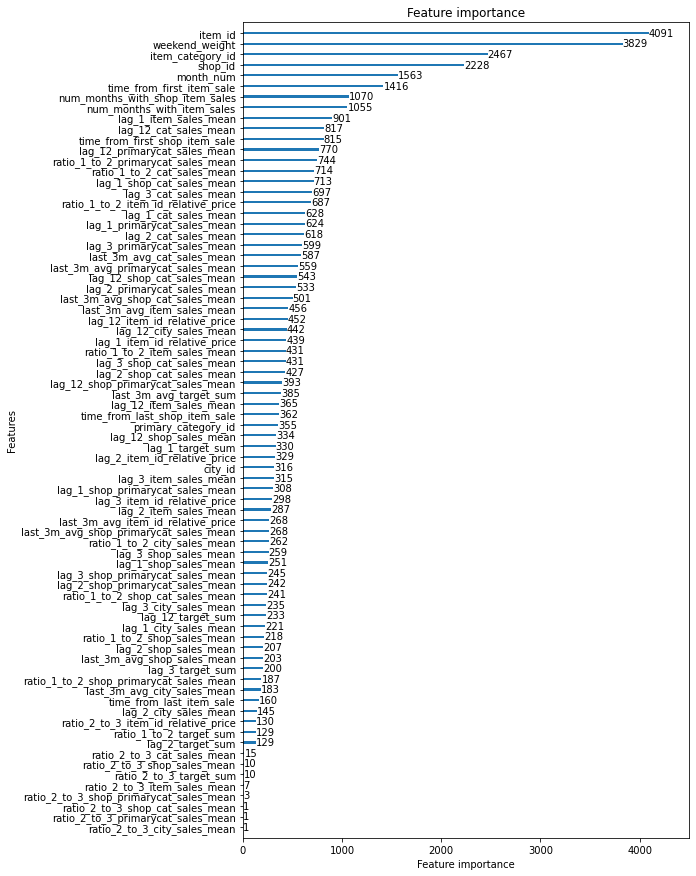

In [13]:
lgbm.plot_importance(model, figsize=(8, 15), grid=False, ignore_zero=False);

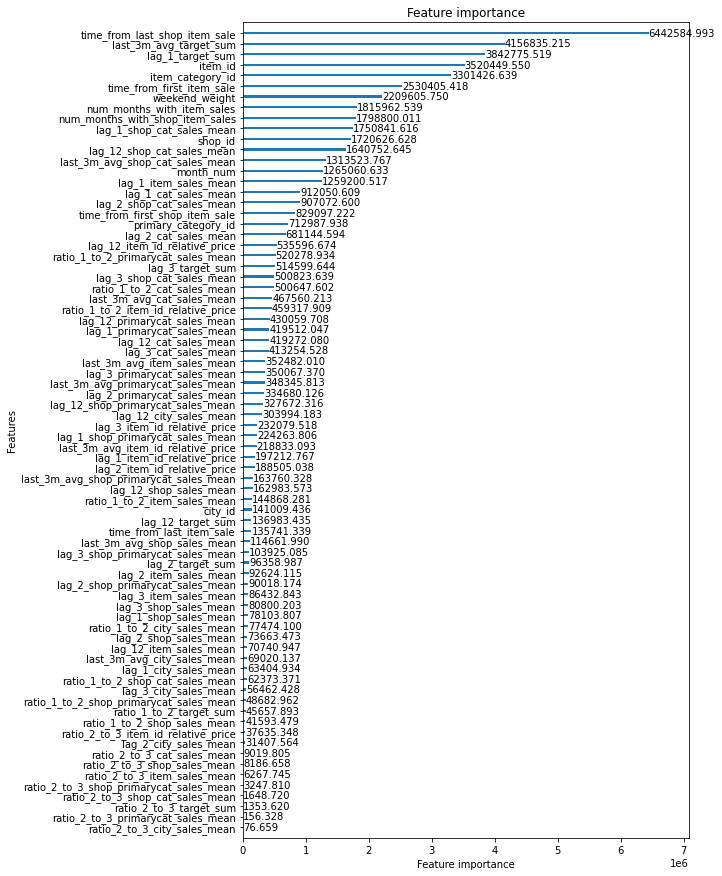

In [14]:
lgbm.plot_importance(model, importance_type='gain', figsize=(8, 15), grid=False, ignore_zero=False);

In [15]:
X_test = pd.read_parquet(DATA_PATH+'X_test.parquet')
y_pred = model.predict(X_test)

subm = pd.DataFrame({'ID': X_test.index, 'item_cnt_month': y_pred}).sort_values('ID')
subm.to_csv('submission.csv', index=False) # LB: 0.95381